In [2]:
import nltk
import spacy
import string
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

nlp = spacy.load('en_core_web_sm')

def preprocess_text(text: str) -> str:
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}

df = pd.DataFrame(data)
df['cleaned_text'] = df['Review'].apply(preprocess_text)
df['tokenized_text'] = df['cleaned_text'].apply(word_tokenize)

print(df[['cleaned_text', 'tokenized_text']])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        cleaned_text  \
0  at mcdonald the food be ok and the service be bad   
1  I would not recommend this japanese restaurant...   
2  I love this restaurant when I travel to thaila...   
3   the menu of loving have a wide variety of option   
4  the staff be friendly and helpful at googles e...   
5  the ambiance at bella italia be amazing and th...   
6  I have a terrible experience at pizza hut the ...   
7  the sushi at sushi express be always fresh and...   
8  the steakhouse on main street have a cozy atmo...   
9  the dessert selection at sweet treat be to die...   

                                      tokenized_text  
0  [at, mcdonald, the, food, be, ok, and, the, se...  
1  [I, would, not, recommend, this, japanese, res...  
2  [I, love, this, restaurant, when, I, travel, t...  
3  [the, menu, of, loving, have, a, wide, variety...  
4  [the, staff, be, friendly, and, helpful, at, g...  
5  [the, ambiance, at, bella, italia, be, amazing... 

In [7]:
model = Word2Vec(df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=8, sg=1)

model.save("word2vec.model")

print(os.path.exists("word2vec.model"))


True


In [16]:
# prompt: rint the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?

# Print the dimensions of the Word2Vec object
print(model.wv.vectors.shape)

# Analyze the dimensions
vector_dimension = model.wv.vectors.shape[1]

print(f"The vector dimension is {vector_dimension}.")

# Explanation:
# - The dimensions of the Word2Vec object are (vocabulary_size, vector_dimension).
# - The vector dimension represents the number of features used to represent each word in the vocabulary.
# - In this case, the vector dimension is 100, which means that each word is represented by a 100-dimensional vector.
# - This vector can be used to capture the semantic meaning of the word and its relationship to other words in the vocabulary.

(69, 100)
The vector dimension is 100.


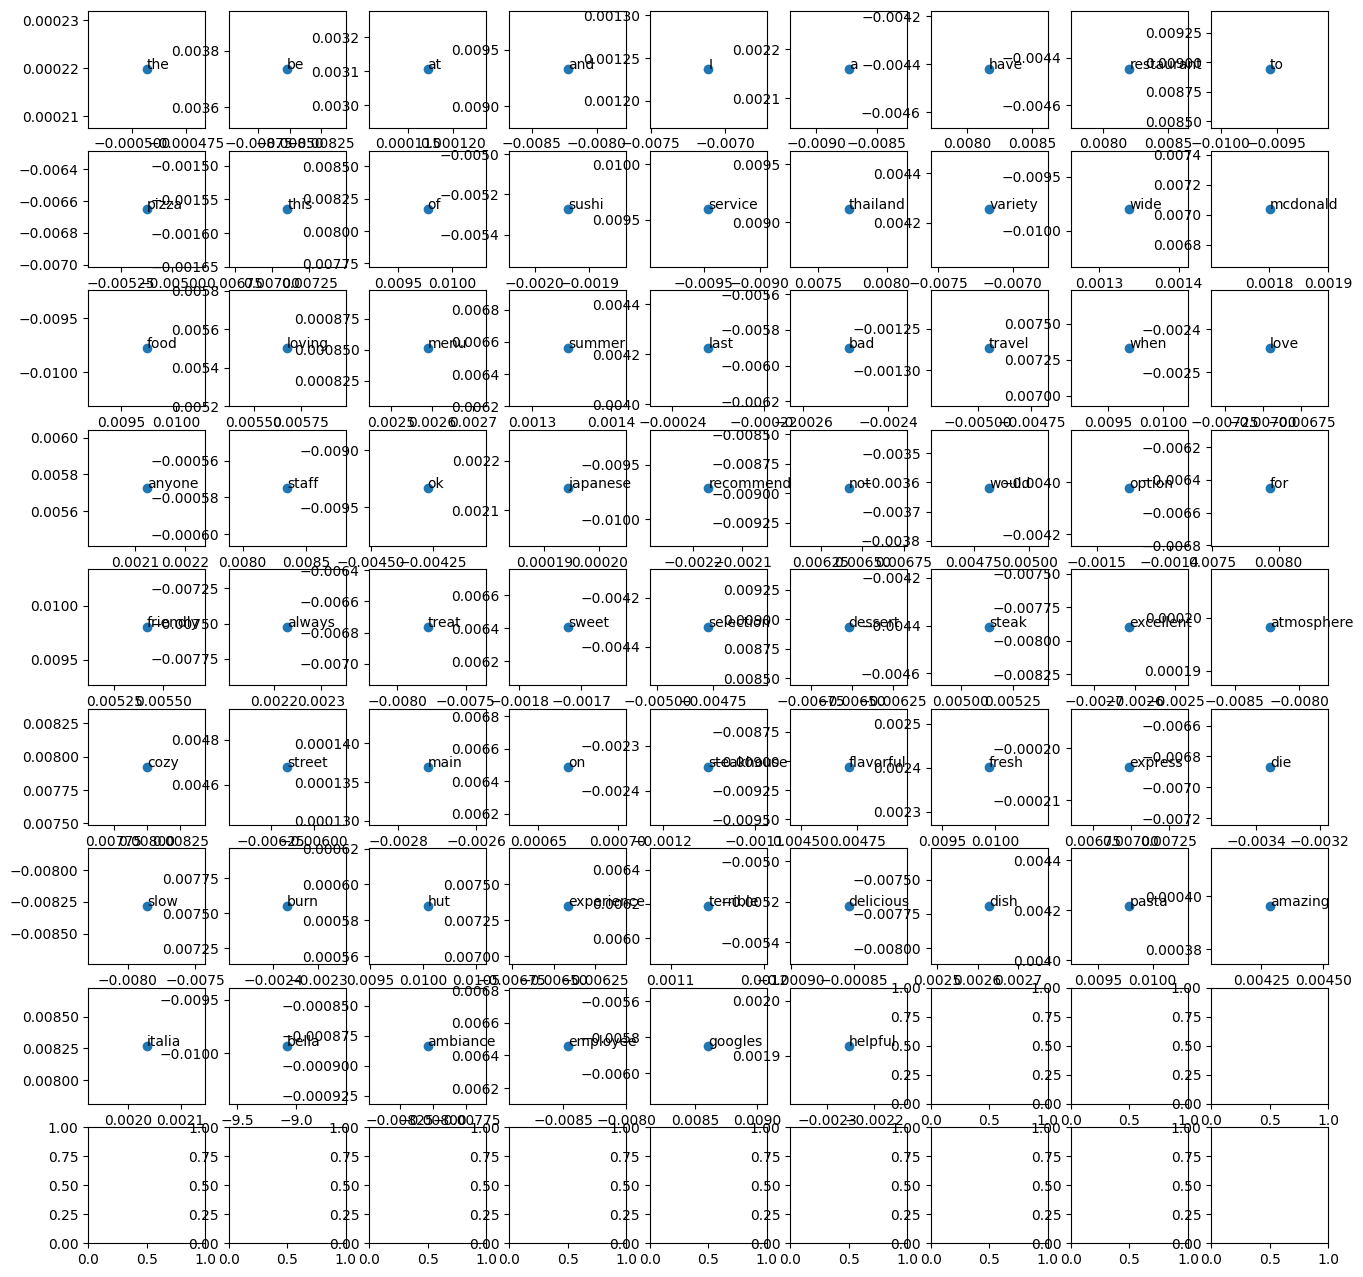

In [19]:
# prompt: Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.
# Finally call this function to see the plots and analyse it
import numpy as np
import matplotlib.pyplot as plt
def plot_word_embeddings(model):
  """
  Plots the word embeddings of a Word2Vec model.

  Args:
    model: A Word2Vec model.
  """

  # Get the number of words in the vocabulary
  vocab_size = len(model.wv.index_to_key)

  # Create a grid of subplots
  grid_size = int(np.ceil(np.sqrt(vocab_size)))
  fig, axes = plt.subplots(grid_size, grid_size, figsize=(16, 16))

  # Loop through the words in the vocabulary
  for i, word in enumerate(model.wv.index_to_key):

    # Get the word embedding
    embedding = model.wv[word]

    # Get the subplot for the current word
    ax = axes[i // grid_size, i % grid_size]

    # Scatter plot the embedding
    ax.scatter(embedding[0], embedding[1])

    # Add a text label to the point
    ax.annotate(word, (embedding[0], embedding[1]))

  # Show the plot
  plt.show()

# Call the function with the Word2Vec model
plot_word_embeddings(model)

# Analysis:
# - The plot shows the distribution of the word embeddings in the 2-dimensional space.
# - Words that are semantically similar tend to be clustered together in the plot.
# - This plot can be used to analyze the relationships between words in the vocabulary and to identify potential outliers.


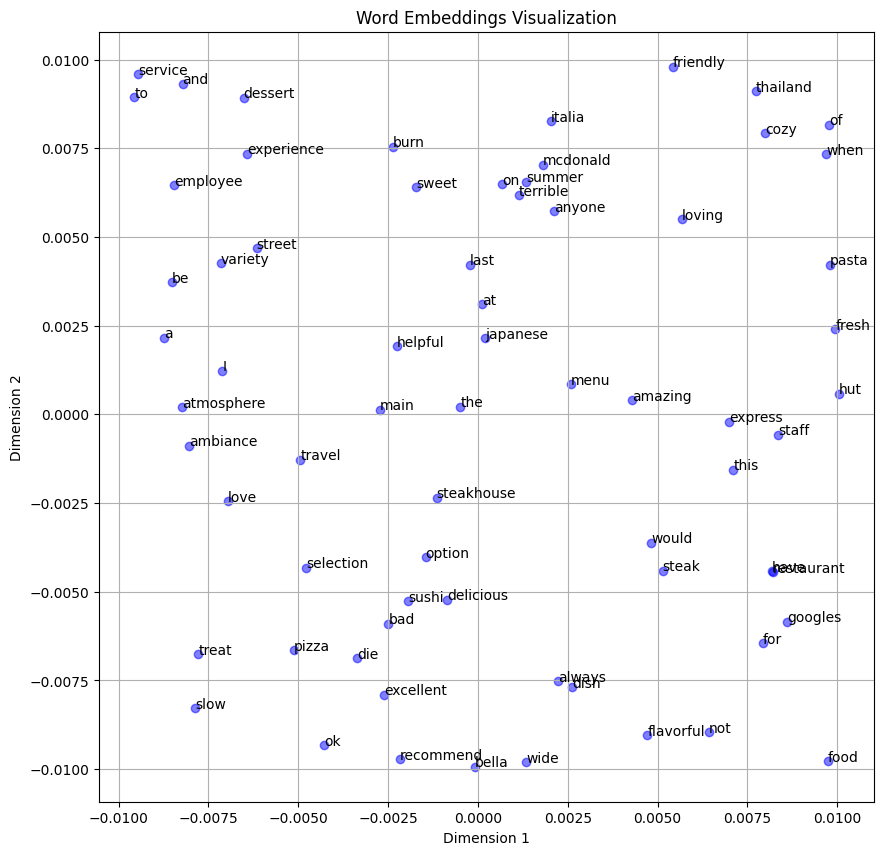

In [24]:
import matplotlib.pyplot as plt

def plot_word_embeddings(word2vec_model):
    words = list(model.wv.key_to_index.keys())
    embeddings = [model.wv[word] for word in words]

    # Extract x and y dimensions of embeddings
    x_values = [embedding[0] for embedding in embeddings]
    y_values = [embedding[1] for embedding in embeddings]

    plt.figure(figsize=(10, 10))
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.5)

    # Annotate each point with its corresponding word
    for i, word in enumerate(words):
        plt.annotate(word, (x_values[i], y_values[i]))

    plt.title('Word Embeddings Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()

# Assuming you have already loaded the Word2Vec model as 'word2vec_model'
plot_word_embeddings(model)
